In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# Phasor

In [2]:
# parameter setting
# sin cos과 같은 그래프를 phasor라고 한다.
# sin cos 그래프, 세상 모든 수는 복소수, a+bi로 표현 가능. f(theta) = e^theta*i(오일러함수) = a+bi 
# e^ix = cosx + isinx
# 시이벌 여기서 진자운동을 다시 공부하네
# 이 복소수를 plot하는 방법을 배움
# 위에다가 시간 개념까지 도입해야 sound가 발생함

amp = 2          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds # 주기
freq = 100.0     # sine frequency, Hz

In [3]:
# generate time
# 1/10000초부터 5000/10000초 까지
t = np.arange(1,sr) # 이렇게 하면 t는 sampling rate만큼의 time tick과 같다. 
t = np.arange(1, (sr*dur)+1)/sr # 0.5초(dur)을 10000개(sr)의 time tick으로 나눈 것.
t

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 4.998e-01, 4.999e-01,
       5.000e-01])

In [4]:
# generate phase
# freq값만큼 주기 반복
#theta = t * 2*np.pi * freq
#theta
theta = np.arange(0, 2*np.pi, 0.1)
theta

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [5]:
theta = t * np.pi * 2 * freq

In [6]:
# generate signal by cosine-phasor
s = amp * np.sin(theta)

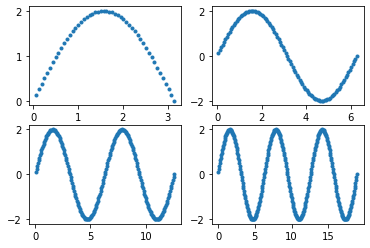

In [7]:
fig = plt.figure()
ax = fig.add_subplot(221)  # 2X2로 plot을 나눈 다음 그 중 1번째 자리에 그린다.
ax.plot(theta[0:50], s[0:50], '.')
ax = fig.add_subplot(222)  # 2X2로 plot을 나눈 다음 그 중 2번째 자리에 그린다.
ax.plot(theta[0:100], s[0:100], '.')
ax = fig.add_subplot(223)  # 2X2로 plot을 나눈 다음 그 중 3번째 자리에 그린다.
ax.plot(theta[0:200], s[0:200], '.')
ax = fig.add_subplot(224)  # 2X2로 plot을 나눈 다음 그 중 4번째 자리에 그린다.
ax.plot(theta[0:300], s[0:300], '.')

Text(0, 0.5, 'value')

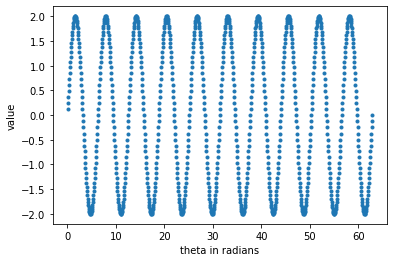

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta[0:1000], s[0:1000], '.')
ax.set_xlabel('theta in radians')
ax.set_ylabel('value')
# 이 그래프는 x축의 증가량에 따른 y축의 증가량이 equivalent하지 않으므로 non-linear하다.
# linear그래프는 x축의 증가량에 따라 y축의 값도 일정하게 증가한다. (또는 감소한다.)

# 아래 그래프는 시간에 대한 개념이 적용되지 않았기 때문에
# 저 파동이 몇초에 걸려서 만들어진 건지 알 수가 없다 -> 소리로 만들어 낼 수가 없다.

Text(0, 0.5, 'real')

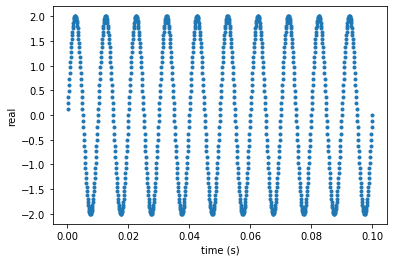

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111) # 1X1에서 1번째 자리
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [10]:
# generate signal by complex-phasor
c = amp * np.exp(theta*1j) # e^(theta)*i = cos(theta) + i*sin(theta)
c

array([1.99605346+1.25581039e-01j, 1.9842294 +2.50666467e-01j,
       1.9645745 +3.74762629e-01j, ..., 1.9842294 -2.50666467e-01j,
       1.99605346-1.25581039e-01j, 2.        +3.92877345e-15j])

Text(0.5, 0, 'imag')

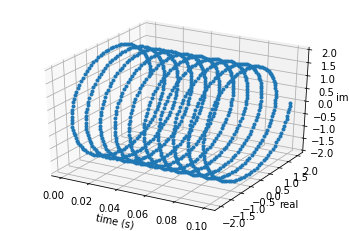

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') # c.real은 c의 실수부 c.imag는 c의 허수부만 받아온다.
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [12]:
ipd.Audio(c.real, rate=sr) # ipd.Audio(s, rate=sr)도 소리가 난다.

In [13]:
# !pip install sounddevice
import sounddevice as sd
sd.play(c.real, sr)

# Generate pulse train

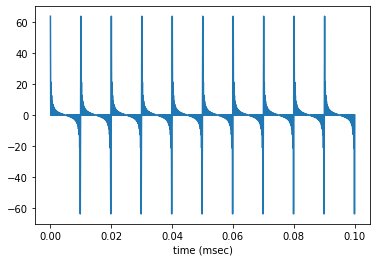

In [14]:
# generate samples, note conversion to float32 array
# praat를 이용해서 pure tone을 합치는 작업을 코딩으로 하는 과정
# 가장 낮은 주파수인 F0를 정하고 sin wave를 만든 다음 그 주파수의 배수만큼 하나 하나씩 쌓아가면 된다.
# sr/2(Nyquist Frequency)이상의 주파수는 표현할 수가 없다.
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    s = s + amp * np.sin(theta)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

#### 지금 위의 그래프는 주파수가 올라가도 그 크기(진폭)가 일정하다. (원래는 조금씩 낮아진다.)
#### 즉, 위 그래프는 스펙트럼이라고 할 수 없다.

In [15]:
def hz2w(F, sr):
    NyFreq = sr/2;
    w = F/NyFreq *np.pi;
    return w

def resonance (srate, F, BW): # 완만하게 내려가는 산을 만드는 작업
    a2 = np.exp(-hz2w(BW,srate))
    omega = F*2*np.pi/srate
    a1 = -2*np.sqrt(a2)*np.cos(omega)
    a = np.array([1, a1, a2])
    b = np.array([sum(a)])
    return a, b

In [16]:
RG = 0  # RG is the frequency of the Glottal Resonator
BWG = 100  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [17]:
a

array([ 1.        , -1.93814485,  0.93910137])

In [18]:
b

array([0.00095651])

In [19]:
RG = 500  # RG is the frequency of the Glottal Resonator
BWG = 60  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [20]:
RG = 1500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [21]:
RG = 2500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [22]:
RG = 3500  # RG is the frequency of the Glottal Resonator
BWG = 200  # BWG is the bandwidth of the Glottal Resonator
a, b=resonance(sr,RG,BWG)
s = lfilter(b, a, s, axis=0)
ipd.Audio(s, rate=sr)

In [23]:
s = lfilter(np.array([1, -1]), np.array([1]), s)
ipd.Audio(s, rate=sr)

# load wav

In [24]:
from scipy.io import wavfile
# sr, s = wavfile.read('a.wav')
nSamp = len(s)
dur = nSamp / sr
t = np.linspace(1/sr, dur, nSamp)

# Fourier tranform

In [25]:
nFFT = nSamp #len(s) Samp의 갯수
amp = [];
for n in range(0,nFFT):
    omega = 2*np.pi*n/nFFT # angular velocity 각속도 n이 1이면 1바퀴, n이 2면 2바퀴... (2pi, 4pi, ... nSamp*pi까지)
    z = np.exp(omega*1j)**(np.arange(0,nSamp))
    amp.append(np.abs(np.dot(s,z))) # s와 z를 dot product(inner product)하고 abs절대값 취한다음 amp[]에 추가

Text(0, 0.5, 'amplitude')

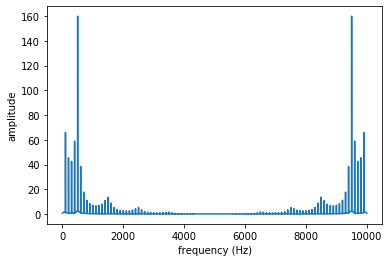

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
freq = np.arange(1,nFFT+1)*sr/nFFT;
ax.plot(freq, amp)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')
# 시험문제 예상 아래 그래프의 bar의 개수와 같은 것은? (sample의 갯수)
# 아래 그래프는 좌우 대칭을 이루고 있음. sampling rate는 그 절반 까지만 의미가 있다.
# bar가 높은 부분이 spectrogram에서 더 진하게 나타남.

# define helper functions

In [27]:
def frame_signal(signal, srate, win_size, win_step):
    frame_size = int(win_size * srate)
    frame_step = int(win_step * srate)

    # Get number of frames
    num_frames = int(np.ceil(np.abs(len(signal) - frame_size) / frame_step))
    # Pad signal
    pad_len = num_frames * frame_step + frame_size
    pad = np.zeros((pad_len - len(signal)))
    signal_padded = np.append(signal, pad)
    # Get within-frame sample indices
    idx1 = np.tile(np.arange(0, frame_size), (num_frames, 1))
    # Get vectors of frame_step increments
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                   (frame_size, 1)).T
    # Get total indices divided by each frame
    indices = idx1 + idx2
    # Get frames divided by each frame based on indices
    frames = signal_padded[indices.astype(np.int32, copy=False)]
#     if cutoff is not None:
#         cutoff_bin = round(cutoff * nfft / (srate))  # hz -> bin
#         frames = frames[:, :cutoff_bin]
    return frames

def get_window(win_size, srate, win_type, win_samp=None):
    '''Get window samples for win_size'''
    if win_samp is None:
        win_samp = int(win_size * srate)  # sec -> sample

    if win_type == 'rect':
        return np.kaiser(win_samp, 0)
    elif win_type == 'hamming':
        return np.hamming(win_samp)
    elif win_type == 'hanning':
        return np.hanning(win_samp)
    elif win_type == 'kaiser':
        return np.kaiser(win_samp, 14)
    elif win_type == 'blackman':
        return np.blackman(win_samp)

def plot_spectrogram(S):
    fig, ax = plt.subplots(facecolor='white', figsize=(14, 6))
    im = ax.imshow(S.T, aspect='auto', origin='lower', cmap=plt.get_cmap('Greys'))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    return fig, ax

def preemphasis(s, pre_emp=0.97):
    # Emphasize high frequency range of the waveform by increasing power(squared amplitude).
    s = lfilter([1, -pre_emp], [1], s)
    return s

# preprocessing signal

In [28]:
max_freq = None  # cutoff freq
win_size = 0.008 # sec
win_step = 0.001  # sec 긴 웨이브를 앞부분 조금만 자르고 스펙트럼 만듬. 이를 앞에서부터 잘라가면서 만든 뒤 이어 붙인게 스펙트럼.
win_type = 'hanning' # options: 'rect', 'hamming', 'hanning', 'kaiser', 'blackman'
nfft = 1024

# Emphasize signal
s = preemphasis(s)
# Frame signal
frames = frame_signal(s, sr, win_size, win_step)
# Apply window function
frames *= get_window(win_size, sr, win_type)
print('frames:', frames.shape)

frames: (492, 80)


(<Figure size 1008x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1e6fdbabe80>)

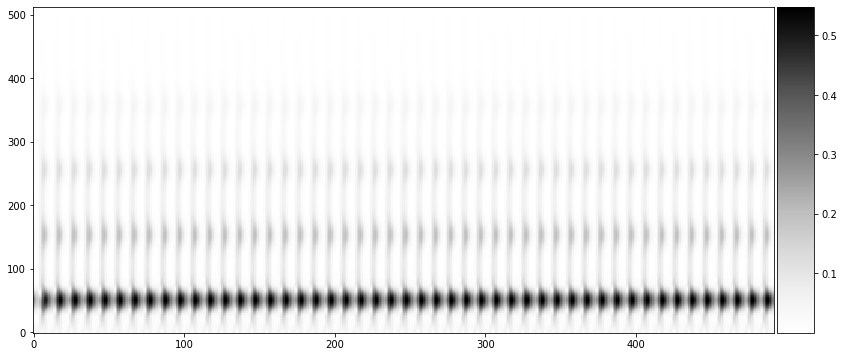

In [29]:
magspec = np.abs(np.fft.rfft(frames, n=nfft)) # frames x (nfft//2 + 1)
plot_spectrogram(magspec)
# dot product 연산 결과는 complex number 이를 abs 취한 것. 연한 부분은 1보다 작은 값, 진한 부분은 1보다 큰 값.
# 이를 제곱하면 진한 부분(1보다 큰 부분)은 더 진해지고 연한 부분(1보다 작은 부분)은 더 작아진다.

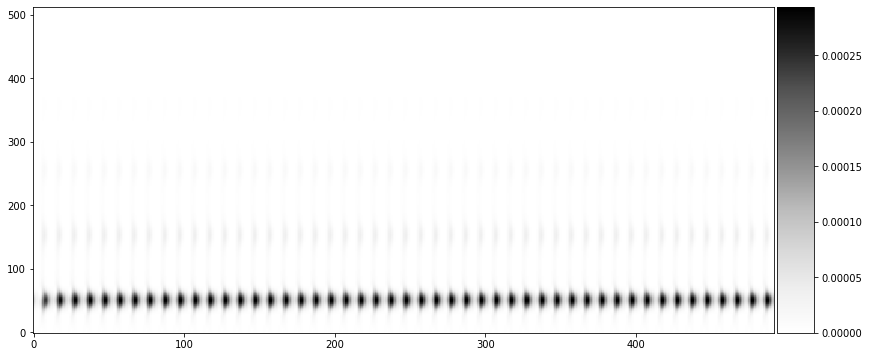

In [30]:
powspec = 1/nfft * (magspec**2)
plot_spectrogram(powspec);
# 위의 그래프를 dot product 연산값을 제곱해서 그린 그래프. 진한 부분과 연한 부분의 대비가 더 심해진다.
# 이런 작업을 하는 이유는 log를 취하기 위해서

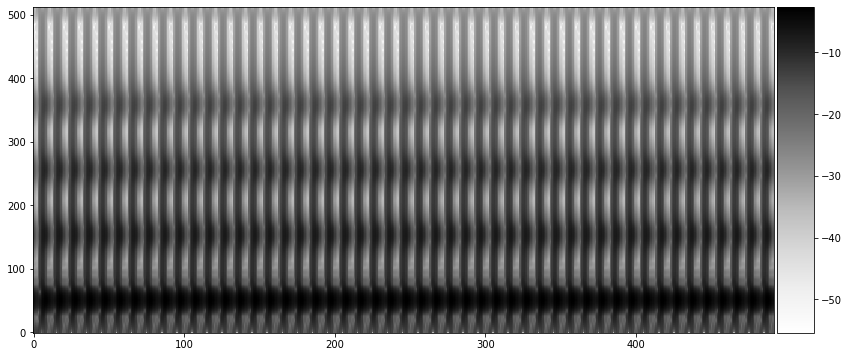

In [31]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);
# 위의 그래프를 log를 취한 값.

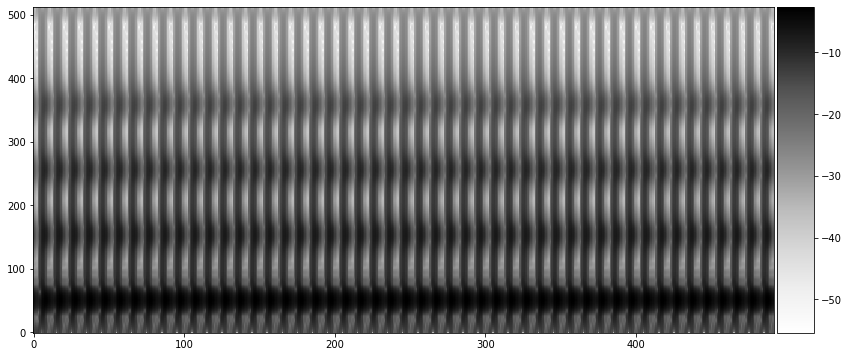

In [32]:
logspec = 10 * np.log10(magspec) # dB scale
plot_spectrogram(logspec);